In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("C:/Users/durga/Desktop/SPU/DS 600/PROJECT/FINAL/cleaned_data.csv")

In [4]:
hate = pd.read_csv("C:/Users/durga/Desktop/SPU/DS 600/PROJECT/FINAL/HATE.csv",encoding='latin1')

In [5]:
hate

,word,sentiment
0,"a55,",negative
1,"a55hole,",negative
2,"aeolus,",negative
3,"ahole,",negative
4,"anal,",negative
...,...,...
770,NFG,negative
771,FYVM,negative
772,ASAFP,negative
773,mofo,negative


In [6]:
# Define a function to perform sentiment analysis using the hate dataset
def hate_sentiment(text):
    positive_words = set(hate.loc[hate['sentiment'] == 'positive', 'word'].values)
    negative_words = set(hate.loc[hate['sentiment'] == 'negative', 'word'].values)
    
    positive_count = sum(1 for word in text.split() if word in positive_words)
    negative_count = sum(1 for word in text.split() if word in negative_words)
    
    if positive_count > negative_count:
        return "positive"
    elif negative_count > positive_count:
        return "negative"
    else:
        return "neutral"

# Apply the sentiment analysis function to your DataFrame
df['Hate_Sentiment'] = df['Comment'].apply(hate_sentiment)


In [7]:
df

,Name,Profile ID,Date,Comment,Comment_Length,Hate_Sentiment
0,scotty2jatty,3.982741e+08,22/04/24 05:27:52,better jakepaul dirty,34.0,negative
1,angelasanders975,6.596329e+10,22/04/24 17:43:49,thats soooooooooo right,24.0,neutral
2,myleslewis_24,1.168729e+10,22/04/24 17:49:54,bro want shirt,21.0,neutral
3,matthew_williams224,2.524021e+10,22/04/24 18:53:42,michaelgalt bro needs beat jakes ass,60.0,negative
4,vremyatherapper,3.178600e+09,22/04/24 19:21:58,mike tko,28.0,neutral
...,...,...,...,...,...,...
1618,life.with.angela,4.862499e+07,19/02/20 09:12:40,pretty u,12.0,neutral
1619,moespoe14,4.984522e+09,19/02/20 12:49:27,she smiling carnivore plant,43.0,neutral
1620,moespoe14,4.984522e+09,19/02/20 12:50:09,lifewithangela where,24.0,neutral
1621,splashelegant97,8.479326e+09,19/02/20 13:58:23,muratserter okay sure lonely person hon,65.0,neutral


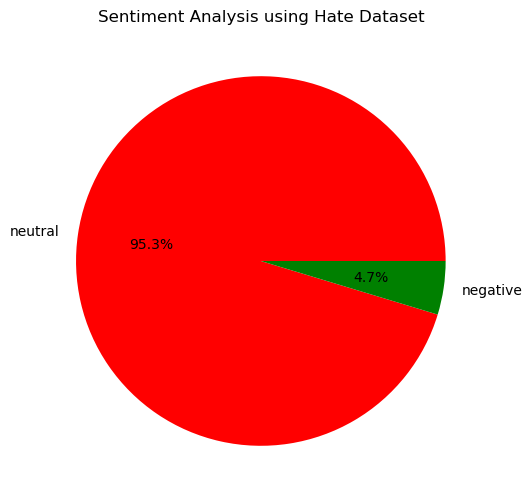

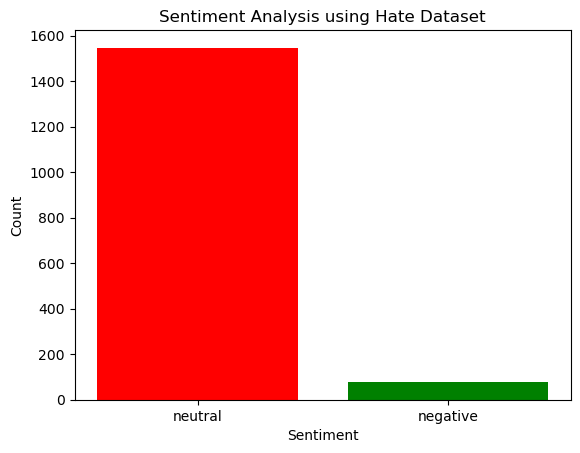

In [8]:
import matplotlib.pyplot as plt

# Count the occurrences of each sentiment
sentiment_counts = df['Hate_Sentiment'].value_counts()

# Plot the pie chart
plt.figure(figsize=(6, 6))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', colors=['red', 'green', 'gray'])
plt.title('Sentiment Analysis using Hate Dataset')
plt.show()

# Plot the bar chart
plt.bar(sentiment_counts.index, sentiment_counts.values, color=['red', 'green', 'gray'])
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Sentiment Analysis using Hate Dataset')
plt.show()

In [9]:
negative_df = df[df['Hate_Sentiment'] == 'negative']

In [10]:
negative_df

,Name,Profile ID,Date,Comment,Comment_Length,Hate_Sentiment
0,scotty2jatty,3.982741e+08,22/04/24 05:27:52,better jakepaul dirty,34.0,negative
3,matthew_williams224,2.524021e+10,22/04/24 18:53:42,michaelgalt bro needs beat jakes ass,60.0,negative
6,schnopp77,5.894240e+09,22/04/24 19:27:32,yeah boy tysons gonna get shit done goat,49.0,negative
19,ccbd_cnm,5.953851e+10,23/04/24 00:54:29,jakepaul hell make,29.0,negative
20,john_ceadeare,4.778849e+09,23/04/24 01:10:37,legend forever jake puss,30.0,negative
...,...,...,...,...,...,...
1483,yivonnecenturion,8.172638e+09,19/02/20 03:13:57,crazy,5.0,negative
1501,coreydavis426,2.956705e+10,10/2/2020 23:56,crazy biznatch keep pretending nothing going w...,112.0,negative
1523,daniellehwt,1.290110e+09,13/02/20 10:50:19,looking crazy truly are come docs let people l...,74.0,negative
1530,tattoo.life.420,4.182903e+09,14/02/20 00:29:42,crazy lying psychoptah,22.0,negative


In [11]:
def add_red_flag(sentiment):
    return '🚩' if sentiment == 'negative' else ''

# Apply the function to create a new column
df['FLAG'] = df['Hate_Sentiment'].apply(add_red_flag)

In [12]:
df.head(n=30)

,Name,Profile ID,Date,Comment,Comment_Length,Hate_Sentiment,FLAG
0,scotty2jatty,3.982741e+08,22/04/24 05:27:52,better jakepaul dirty,34.0,negative,🚩
1,angelasanders975,6.596329e+10,22/04/24 17:43:49,thats soooooooooo right,24.0,neutral,
2,myleslewis_24,1.168729e+10,22/04/24 17:49:54,bro want shirt,21.0,neutral,
3,matthew_williams224,2.524021e+10,22/04/24 18:53:42,michaelgalt bro needs beat jakes ass,60.0,negative,🚩
4,vremyatherapper,3.178600e+09,22/04/24 19:21:58,mike tko,28.0,neutral,
5,pkkw777,6.329501e+09,22/04/24 19:27:03,t shirt though,23.0,neutral,
6,schnopp77,5.894240e+09,22/04/24 19:27:32,yeah boy tysons gonna get shit done goat,49.0,negative,🚩
7,kryztaf0,4.992125e+10,22/04/24 19:40:16,please win mike,15.0,neutral,
8,lujackson_0,9.054607e+08,22/04/24 19:56:57,want t shirt,23.0,neutral,
9,iiithomaspeterson,6.998862e+09,22/04/24 19:58:02,love shirt,15.0,neutral,
